# Preliminary Analysis of Tesla Stock - Yahoo Finance

## Color Pallette

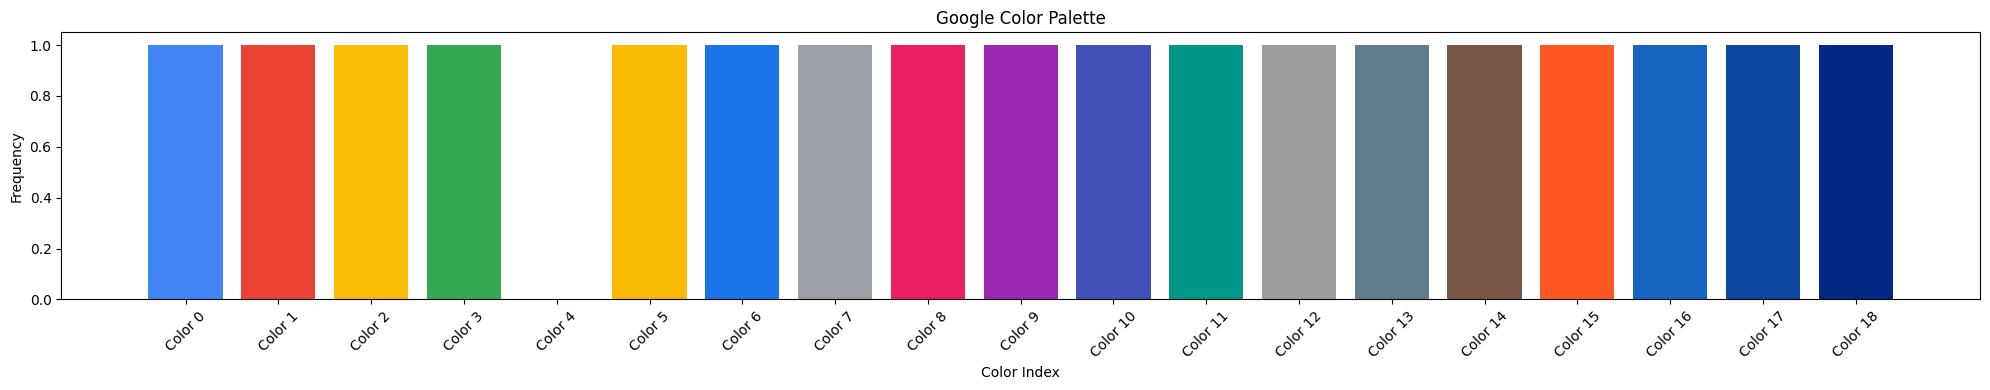

In [ ]:
import matplotlib.pyplot as plt

# Custom Google-inspired color palette with added colors
google_colors = ['#4285F4',  # blue 0
                 '#EA4335',  # red 1
                 '#FBBC05',  # yellow 2
                 '#34A853',  # green 3
                 '#FFFFFF',  # white 4
                 '#FABB05',  # amber 5
                 '#1A73E8',  # darker blue 6
                 '#9AA0A6',  # grey 7
                 '#E91E63',  # pink 8
                 '#9C27B0',  # purple 9
                 '#3F51B5',  # indigo 10
                 '#009688',  # teal 11
                 '#9E9E9E',  # grey 12
                 '#607D8B',  # blue grey 13
                 '#795548',  # brown 14
                 '#FF5722',  # deep orange 15
                 '#1565C0',  # darker blue 16
                 '#0D47A1',  # even darker blue 17
                 '#002884']  # darkest blue 18

# Get the indices and colors
indices = range(len(google_colors))
colors = google_colors

# Create a bar chart
plt.figure(figsize=(20, 4))
plt.bar(indices, height=1, width=0.8, color=colors, tick_label=[f'Color {i}' for i in indices])
plt.xticks(rotation=45)
plt.xlabel('Color Index')
plt.ylabel('Frequency')
plt.title('Google Color Palette')

# Annotate colors and indices
for i, color in enumerate(colors):
    plt.annotate(f'{color} (Index: {i})', (i, 1.1), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

## Data Exploration

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

In [ ]:
# Get Tesla stock data
tesla = yf.Ticker("TSLA")

# Get historical data
tesla_hist = tesla.history(period="max")

# Print the historical data
tesla_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,175.449997,182.869995,174.800003,177.770004,85391500,0.0,0.0
2024-03-12 00:00:00-04:00,177.770004,179.429993,172.410004,177.539993,87391700,0.0,0.0
2024-03-13 00:00:00-04:00,173.050003,176.050003,169.149994,169.479996,106524500,0.0,0.0


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Get Tesla stock data
tesla = yf.Ticker("TSLA")

# Get historical data
tesla_hist = tesla.history(period="max")

# Print the first few rows of the historical data
print("Original Data:")
print(tesla_hist.head())

# Remove unnecessary columns
columns_to_remove = ['Dividends', 'Stock Splits']
tesla_hist = tesla_hist.drop(columns=columns_to_remove)

# Check for missing values
print("\nMissing Values:")
missing_values = tesla_hist.isnull().sum()
print(missing_values)

# Handle missing values (if any)
tesla_hist = tesla_hist.fillna(method='ffill')  # Forward fill missing values

# Check for duplicates
print("\nDuplicate Rows:")
duplicate_rows = tesla_hist.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Check for infinite values
print("\nInfinite Values:")
infinite_values = tesla_hist.isin([np.inf, -np.inf]).sum()
print(infinite_values)


Original Data:
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  

Missing Values:
Open      0
High      0
Low       0


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Get Tesla stock data
tesla = yf.Ticker("TSLA")

# Get historical data
tesla_hist = tesla.history(period="max")

# Print the first few rows of the historical data
print("Original Data:")
print(tesla_hist.head())

# Remove unnecessary columns
columns_to_remove = ['Dividends', 'Stock Splits']
tesla_hist = tesla_hist.drop(columns=columns_to_remove)

# Check for missing values
print("\nMissing Values:")
print(tesla_hist.isnull().sum())

# Handle missing values (if any)
tesla_hist = tesla_hist.fillna(method='ffill')  # Forward fill missing values

# Convert date column to datetime format
tesla_hist.index = pd.to_datetime(tesla_hist.index)

# Create new features
tesla_hist['Day'] = tesla_hist.index.day
tesla_hist['Month'] = tesla_hist.index.month
tesla_hist['Year'] = tesla_hist.index.year
tesla_hist['DayOfWeek'] = tesla_hist.index.dayofweek

# Normalize the data (example: min-max normalization)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tesla_hist[['Open', 'High', 'Low', 'Close', 'Volume']])
tesla_hist[['Open', 'High', 'Low', 'Close', 'Volume']] = scaled_data

# Print the preprocessed data
print("\nPreprocessed Data:")
tesla_hist

Original Data:
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  

Missing Values:
Open      0
High      0
Low       0


,Open,High,Low,Close,Volume,Day,Month,Year,DayOfWeek
Date,,,,,,,,,
2010-06-29 00:00:00-04:00,0.000465,0.001350,0.000422,0.001319,0.306605,29,6,2010,1
2010-06-30 00:00:00-04:00,0.001568,0.002224,0.001371,0.001309,0.280640,30,6,2010,2
2010-07-01 00:00:00-04:00,0.001439,0.001498,0.000871,0.001004,0.133184,1,7,2010,3
2010-07-02 00:00:00-04:00,0.001114,0.001043,0.000614,0.000554,0.082560,2,7,2010,4
2010-07-06 00:00:00-04:00,0.000627,0.000543,0.000140,0.000051,0.110956,6,7,2010,1
...,...,...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,0.424894,0.439687,0.429491,0.432158,0.091651,11,3,2024,0
2024-03-12 00:00:00-04:00,0.430547,0.431366,0.423585,0.431596,0.093844,12,3,2024,1
2024-03-13 00:00:00-04:00,0.419046,0.423189,0.415529,0.411885,0.114816,13,3,2024,2


In [ ]:


# Filter for non-zero dividends or stock splits
non_zero = dividends_splits[(dividends_splits['Dividends'] != 0) | (dividends_splits['Stock Splits'] != 0)]

# Print the non-zero entries
print("Non-zero Dividend and Stock Split Entries:")
print(non_zero)

Non-zero Dividend and Stock Split Entries:
                           Dividends  Stock Splits
Date                                              
2020-08-31 00:00:00-04:00        0.0           5.0
2022-08-25 00:00:00-04:00        0.0           3.0


In [ ]:
tesla_hist['Daily_Return'] = tesla_hist['Close'].pct_change()
tesla_hist['Cumulative_Return'] = (1 + tesla_hist['Daily_Return']).cumprod()
tesla_hist

NameError: name 'tesla_hist' is not defined

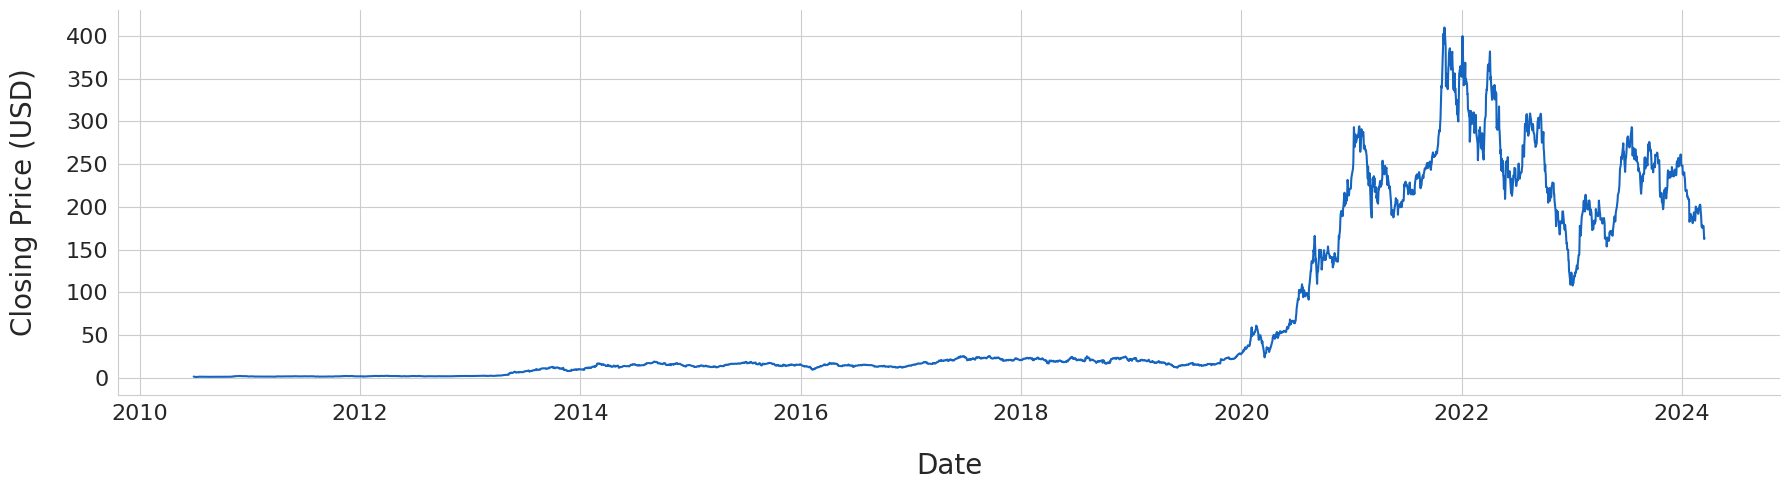

In [ ]:
# Plot the closing prices with seaborn's lineplot for a visually appealing look
plt.figure(figsize=(18, 5))  # Figure size

# Custom Google-inspired color palette with added colors
google_colors = ['#4285F4',  # blue 0
                 '#EA4335',  # red 1
                 '#FBBC05',  # yellow 2
                 '#34A853',  # green 3
                 '#FFFFFF',  # white 4
                 '#FABB05',  # amber 5
                 '#1A73E8',  # darker blue 6
                 '#9AA0A6',  # grey 7
                 '#E91E63',  # pink 8
                 '#9C27B0',  # purple 9
                 '#3F51B5',  # indigo 10
                 '#009688',  # teal 11
                 '#9E9E9E',  # grey 12
                 '#607D8B',  # blue grey 13
                 '#795548',  # brown 14
                 '#FF5722',  # deep orange 15
                 '#1565C0',  # darker blue 16
                 '#0D47A1',  # even darker blue 17
                 '#002884']  # darkest blue 18

# Set the custom palette
sns.set_palette(sns.color_palette(google_colors))

# Set the style to "whitegrid" for a cleaner look
sns.set_style("whitegrid")

# Increase the line thickness and add transparency
sns.lineplot(x=tesla_hist.index, y=tesla_hist['Close'], linewidth=1.5, color=google_colors[16])

# Customize the plot with titles, labels, and a theme
plt.xlabel('Date', fontsize=20,  labelpad=20)
plt.ylabel('Closing Price (USD)', fontsize=20, labelpad=20)

plt.xticks(rotation=0, fontsize=16)  # Rotate x-axis labels for better readability and increase font size
plt.yticks(fontsize=16)  # Increase y-axis tick label font size

# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True)


# Finally, show the plot
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [ ]:
# import yfinance as yf
# import mplfinance as mpf

# # Fetch historical data for Tesla from Yahoo Finance
# ticker_symbol = 'TSLA'
# tesla_data = yf.Ticker(ticker_symbol)

# # Get the historical data for the last 6 months
# tesla_hist = tesla_data.history(period="2mo")

# # Create a candlestick chart
# mpf.plot(tesla_hist, type='candle', style='charles',
#          title='Tesla Stock - Candlestick Chart',
#          ylabel='Price (USD)',
#          ylabel_lower='Volume',
#          volume=True,
#          figratio=(16,8),
#          show_nontrading=False)

# # Save the plot if needed
# # mpf.plot(tesla_hist, type='candle', style='charles', volume=True, savefig='tesla_candlestick.png')


In [ ]:
# Calculate descriptive statistics for the 'Close' column
descriptive_stats = tesla_hist['Close'].describe()

# Additionally, you can calculate the variance and the skewness for more insights
variance = tesla_hist['Close'].var()
skewness = tesla_hist['Close'].skew()

# Print the descriptive statistics, variance, and skewness
print(descriptive_stats)
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")


count    3452.000000
mean       72.410177
std       101.954858
min         1.053333
25%        11.081833
50%        17.118000
75%       136.291336
max       409.970001
Name: Close, dtype: float64
Variance: 10394.793148529128
Skewness: 1.345213383078045


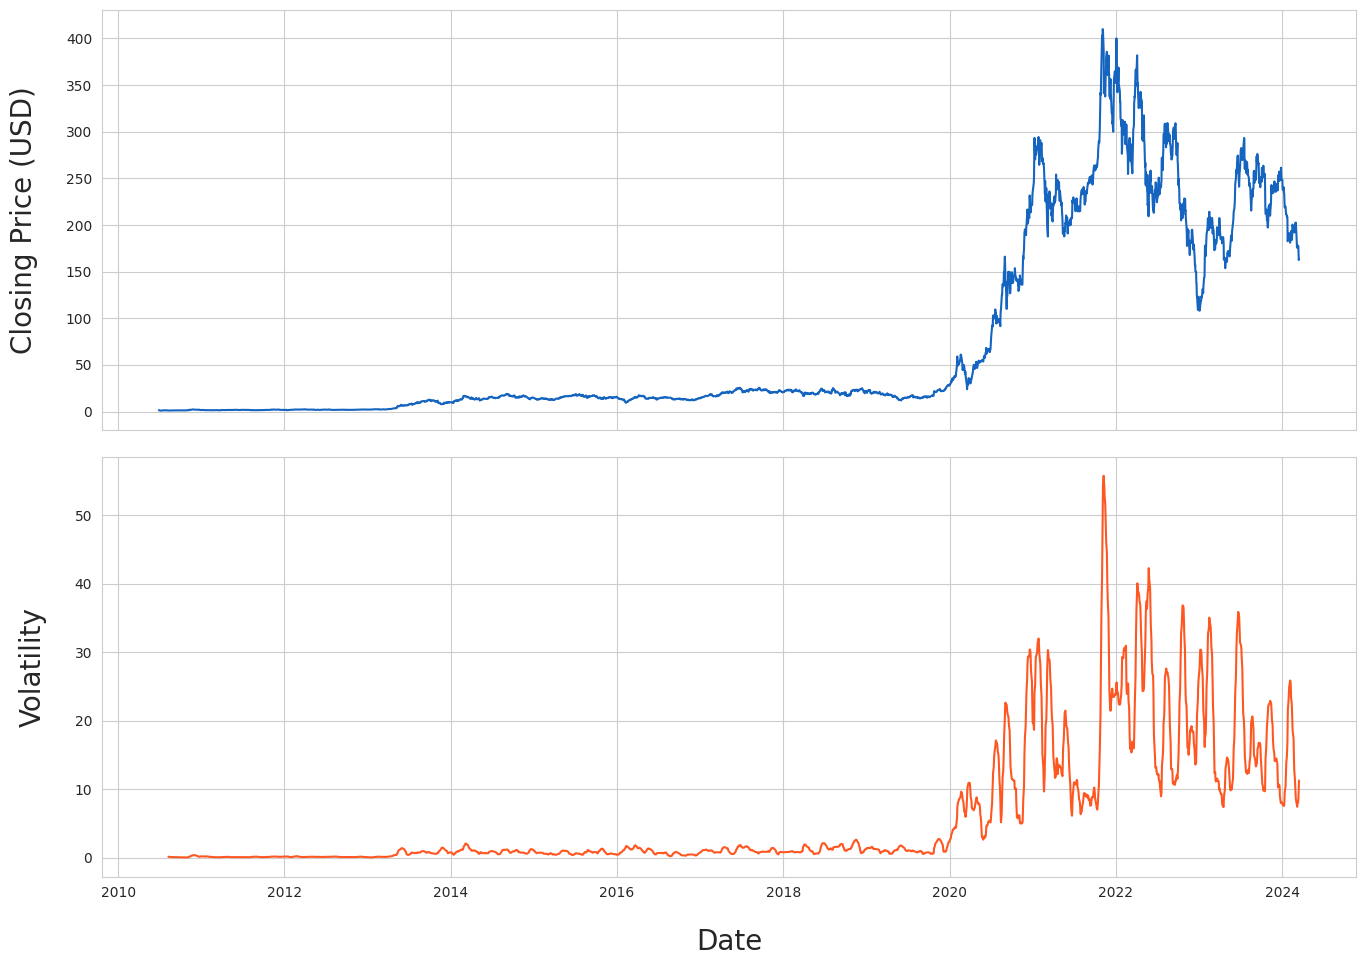

In [ ]:
# Fetch historical data from Yahoo Finance
tesla_data = yf.Ticker('TSLA')

# Get the historical closing prices
tesla_hist = tesla_data.history(period="max")

# Calculate the rolling standard deviation (volatility)
window = 30  # 30-day rolling window
tesla_hist['Rolling Std'] = tesla_hist['Close'].rolling(window=window).std()


# Custom Google-inspired color palette with added colors
google_colors = ['#4285F4',  # blue 0
                 '#EA4335',  # red 1
                 '#FBBC05',  # yellow 2
                 '#34A853',  # green 3
                 '#FFFFFF',  # white 4
                 '#FABB05',  # amber 5
                 '#1A73E8',  # darker blue 6
                 '#9AA0A6',  # grey 7
                 '#E91E63',  # pink 8
                 '#9C27B0',  # purple 9
                 '#3F51B5',  # indigo 10
                 '#009688',  # teal 11
                 '#9E9E9E',  # grey 12
                 '#607D8B',  # blue grey 13
                 '#795548',  # brown 14
                 '#FF5722',  # deep orange 15
                 '#1565C0',  # darker blue 16
                 '#0D47A1',  # even darker blue 17
                 '#002884']  # darkest blue 18


# Set the custom palette
sns.set_palette(sns.color_palette(google_colors))



# Create a plot with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the closing prices
sns.lineplot(x=tesla_hist.index, y=tesla_hist['Close'], ax=ax1, color=google_colors[16])

ax1.set_ylabel('Closing Price (USD)', fontsize=20, labelpad=20)

# Plot the rolling standard deviation (volatility)
sns.lineplot(x=tesla_hist.index, y=tesla_hist['Rolling Std'], ax=ax2, color=google_colors[15])

ax2.set_xlabel('Date', fontsize=20, labelpad=20)
ax2.set_ylabel('Volatility', fontsize=20, labelpad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Set the style
sns.set(style='whitegrid', context='talk')

# Show the plot
plt.tight_layout()
plt.show()


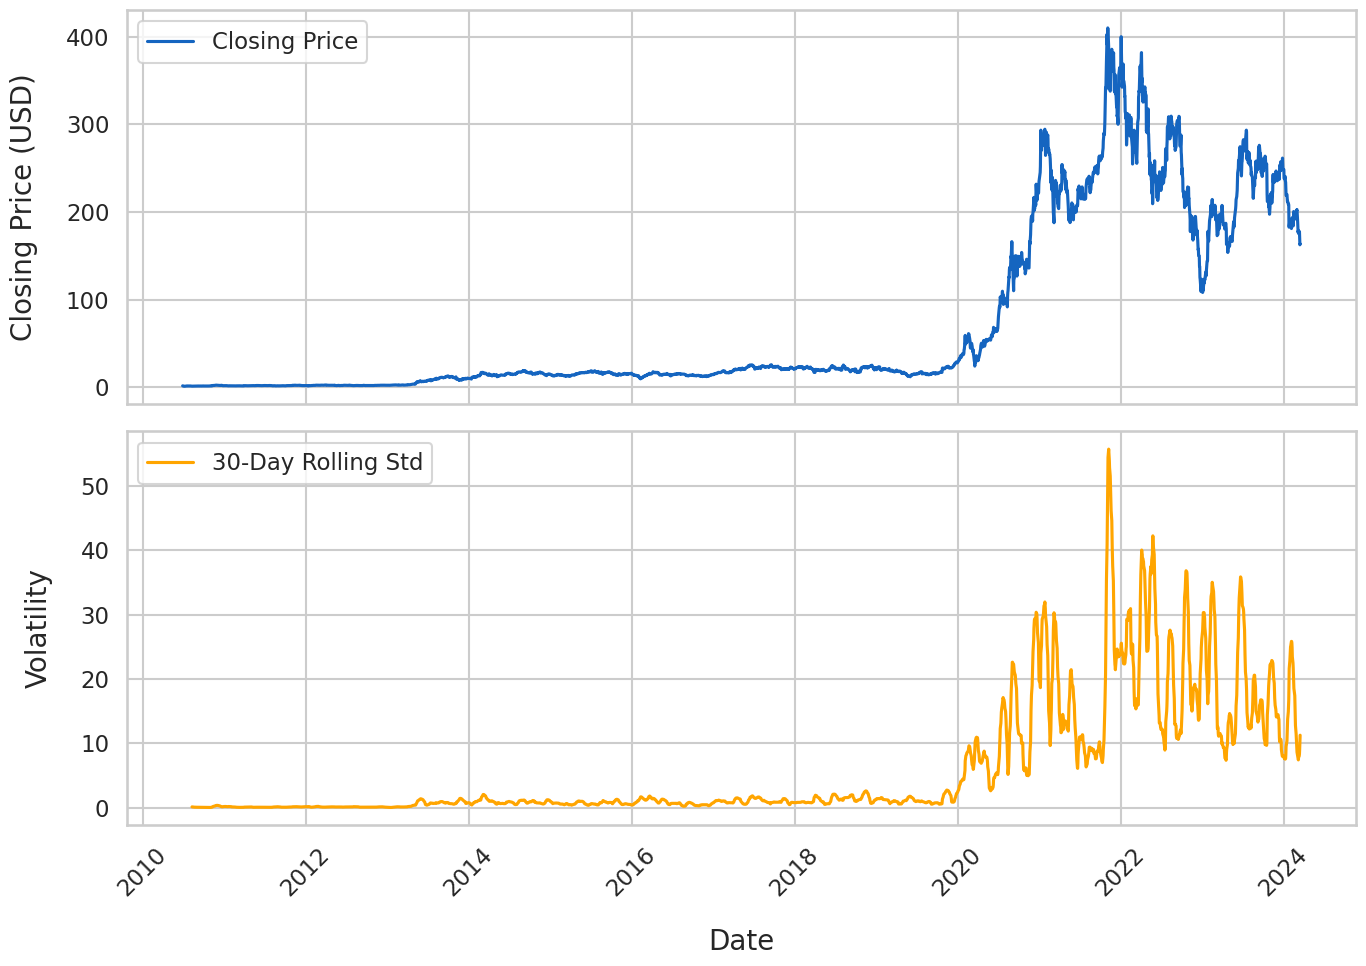

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch historical data from Yahoo Finance
tesla_data = yf.Ticker('TSLA')

# Get the historical closing prices
tesla_hist = tesla_data.history(period="max")

# Calculate the rolling standard deviation (volatility)
window = 30  # 30-day rolling window
tesla_hist['Rolling Std'] = tesla_hist['Close'].rolling(window=window).std()

# Custom Google-inspired color palette with added colors
google_colors = ['#4285F4',  # blue 0
                 '#EA4335',  # red 1
                 '#FBBC05',  # yellow 2
                 '#34A853',  # green 3
                 '#FFFFFF',  # white 4
                 '#FABB05',  # amber 5
                 '#1A73E8',  # darker blue 6
                 '#9AA0A6',  # grey 7
                 '#E91E63',  # pink 8
                 '#9C27B0',  # purple 9
                 '#3F51B5',  # indigo 10
                 '#009688',  # teal 11
                 '#9E9E9E',  # grey 12
                 '#607D8B',  # blue grey 13
                 '#795548',  # brown 14
                 '#FF5722',  # deep orange 15
                 '#1565C0',  # darker blue 16
                 '#0D47A1',  # even darker blue 17
                 '#002884']  # darkest blue 18

# Set the custom palette
sns.set_palette(sns.color_palette(google_colors))

# Create a plot with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot the closing prices
close_line = sns.lineplot(x=tesla_hist.index, y=tesla_hist['Close'], ax=ax1, color=google_colors[16], label='Closing Price')
ax1.set_ylabel('Closing Price (USD)', fontsize=20, labelpad=20)
ax1.legend(loc='upper left')

# Plot the rolling standard deviation (volatility)
volatility_line = sns.lineplot(x=tesla_hist.index, y=tesla_hist['Rolling Std'], ax=ax2, color='orange', label='30-Day Rolling Std')
ax2.set_xlabel('Date', fontsize=20, labelpad=20)
ax2.set_ylabel('Volatility', fontsize=20, labelpad=20)
ax2.legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the style
sns.set(style='whitegrid', context='talk')

# Show the plot
plt.tight_layout()
plt.show()

## Annual Change Tesla

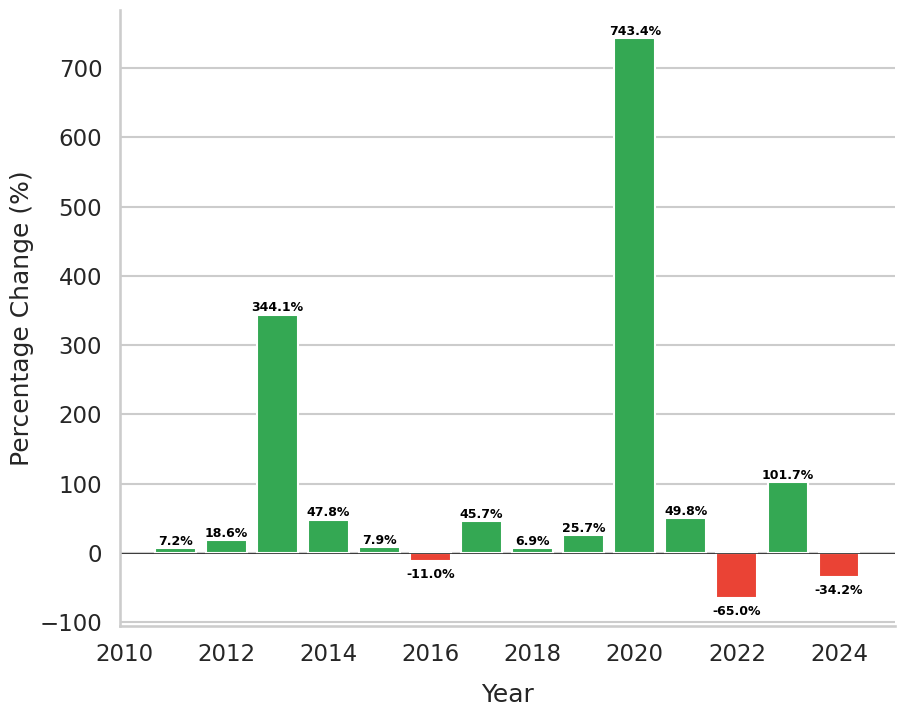

In [ ]:
plt.rcdefaults()
# Set the style
sns.set(style='whitegrid', context='talk')

# Calculate the annual percentage change
annual_change = tesla_hist['Close'].resample('Y').ffill().pct_change() * 100

# Plot the annual percentage change
annual_change = annual_change[1:]  # Exclude the first year which will be NaN

# Create the figure with a larger size for better visibility
plt.figure(figsize=(10, 8))

# Generate colors based on the value being positive or negative
colors = ['#34A853' if x > 0 else '#EA4335' for x in annual_change]

# Plot the bars with the generated colors
bars = plt.bar(annual_change.index.year, annual_change, color=colors)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0,
             height + (10 if height > 0 else -20),
             f'{height:.1f}%',
             ha='center',
             va='center',
             fontsize=9,
             color='black',
             fontweight='bold')

# Customize the plot with titles and labels
plt.xlabel('Year', labelpad=12)
plt.ylabel('Percentage Change (%)')

# Add a horizontal line at 0% to distinguish gains and losses
plt.axhline(y=0, color='black', linewidth=0.5)



# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.grid(axis='x')  # Show horizontal grid lines with decreased opacity
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

plt.show()

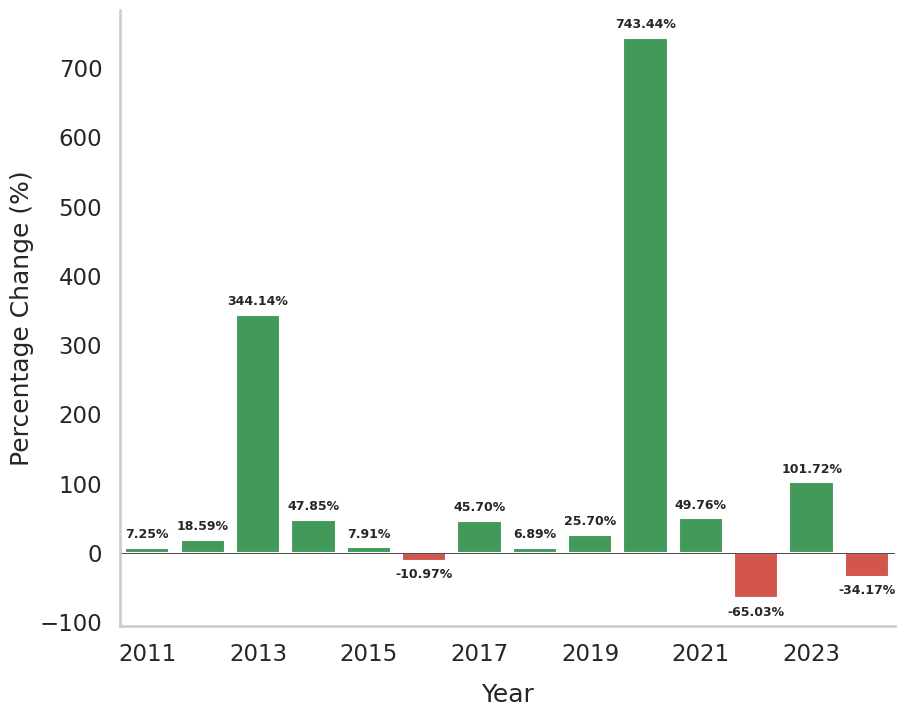

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Custom Google-inspired color palette
google_colors = ['#4285F4',  # blue
                 '#EA4335',  # red
                 '#FBBC05',  # yellow
                 '#34A853',  # green
                 '#FFFFFF',  # white
                 '#FABB05',  # amber
                 '#1A73E8',  # darker blue
                 '#9AA0A6']  # grey

# Assuming 'annual_change' is a pandas Series with DateTimeIndex or period index
# Replace this with your actual data loading code
# annual_change = ...

# Exclude the year 2010
annual_change_filtered = annual_change[annual_change.index.year != 2010]

# Set Seaborn style
sns.set_style("whitegrid")

# Set the custom palette
sns.set_palette(sns.color_palette(google_colors))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data using Seaborn barplot
# Use custom palette, taking first two colors for positive and negative
sns.barplot(x=annual_change_filtered.index.year, y=annual_change_filtered, hue=annual_change_filtered.ge(0),
            palette=[google_colors[1], google_colors[3]], ax=ax, dodge=False)

# Customize the plot
ax.set_xlabel('Year', labelpad=12)
ax.set_ylabel('Percentage Change (%)')
ax.axhline(y=0, color='black', linewidth=0.5)  # Distinguish gains and losses

# Customize the x-axis to display ticks every two years
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

# Enhance plot aesthetics
sns.despine(ax=ax, top=True, right=True)
ax.legend_.remove()  # Omit automatic legend
ax.yaxis.grid(False)  # Maintain horizontal lines only
ax.xaxis.grid(False)  # Enable vertical grid lines for clarity

# Annotate bars with percentage change, skipping the year 2010
for rect, year in zip(ax.patches, annual_change_filtered.index.year):
    height = rect.get_height()
    xytext = (0, -15) if height < 0 else (0, 5)  # Adjust text position based on value
    if year != 2010:  # Skip the year 2010
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=xytext,
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9,
                    fontweight='bold')


# Add minor ticks and hooks on the x-axis
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
ax.tick_params(axis='x', which='minor', length=5, color='black')
plt.show()


# MACD

In [ ]:
import pandas as pd
import yfinance as yf

def calculate_macd(data, column_name='Close', fast_period=12, slow_period=26, signal_period=9):
    """
    Calculate the MACD and signal line for a given data set.

    Args:
        data (pandas.DataFrame): A DataFrame containing at least one column for prices.
        column_name (str, optional): The name of the column to use for MACD calculation. Default is 'Close'.
        fast_period (int, optional): The number of periods for the fast EMA. Default is 12.
        slow_period (int, optional): The number of periods for the slow EMA. Default is 26.
        signal_period (int, optional): The number of periods for the signal line EMA. Default is 9.

    Returns:
        pandas.DataFrame: A DataFrame containing the original data, the MACD line, and the signal line.
    """
    # Ensure the input data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise TypeError("Input data must be a pandas DataFrame.")

    # Extract the specified column from the input DataFrame
    prices = data[column_name]

    # Calculate the short and long EMAs
    short_ema = prices.ewm(span=fast_period, adjust=False).mean()
    long_ema = prices.ewm(span=slow_period, adjust=False).mean()

    # Calculate the MACD line
    macd_line = short_ema - long_ema

    # Calculate the signal line
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()

    # Combine the original data, MACD line, and signal line into a single DataFrame
    result = pd.DataFrame({
        'Data': prices,
        'MACD': macd_line,
        'Signal': signal_line
    })

    return result

# Download stock data for Apple Inc. (AAPL) from Yahoo Finance
aapl = yf.Ticker("AAPL")
data = aapl.history(period="2y", auto_adjust=True)

# Calculate the MACD using the default parameters
macd_data = calculate_macd(data)

# Print the first few rows of the result
print(macd_data.head())

                                 Data      MACD    Signal
Date                                                     
2022-03-16 00:00:00-04:00  157.786865  0.000000  0.000000
2022-03-17 00:00:00-04:00  158.805206  0.081235  0.016247
2022-03-18 00:00:00-04:00  162.127243  0.408961  0.094790
2022-03-21 00:00:00-04:00  163.511429  0.771485  0.230129
2022-03-22 00:00:00-04:00  166.912552  1.318037  0.447710


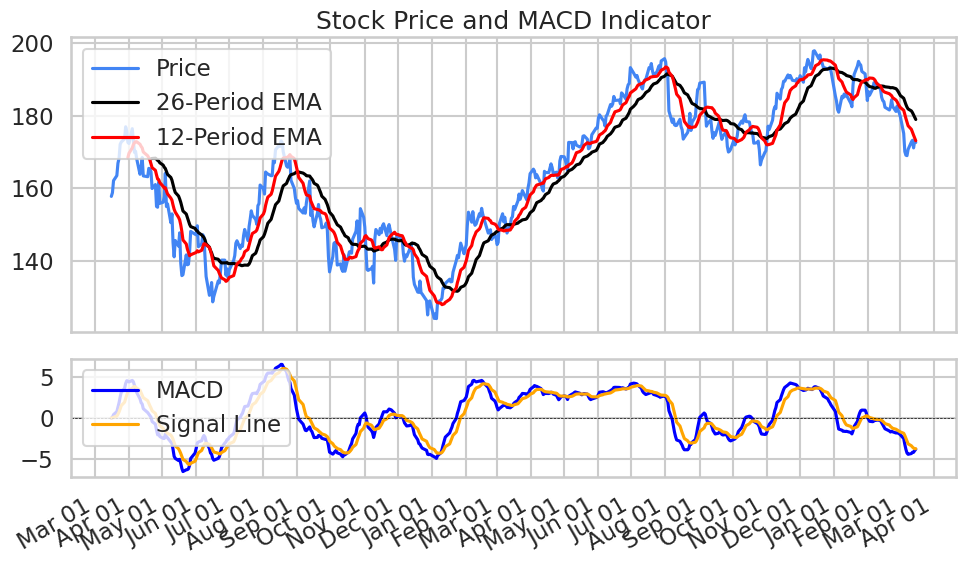

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming macd_data is a DataFrame with 'Data', 'MACD', and 'Signal' columns

# Create a new figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,6), gridspec_kw={'height_ratios': [2.5, 1]}, sharex=True)

# Plot the stock price on the first subplot
ax1.plot(macd_data.index, macd_data['Data'], label='Price')
# Highlight the moving averages: using a 26-period and a 12-period (adjust these as necessary)
ax1.plot(macd_data.index, macd_data['Data'].rolling(window=26).mean(), label='26-Period EMA', color='black')
ax1.plot(macd_data.index, macd_data['Data'].rolling(window=12).mean(), label='12-Period EMA', color='red')

ax1.legend(loc='upper left')
ax1.set_title('Stock Price and MACD Indicator')
ax1.grid(True)

# Plot the MACD and signal lines on the second subplot
ax2.plot(macd_data.index, macd_data['MACD'], label='MACD', color='blue')
ax2.plot(macd_data.index, macd_data['Signal'], label='Signal Line', color='orange')

# Highlight the zero line
ax2.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax2.legend(loc='upper left')
ax2.grid(True)

# Improve the x-axis date formatting
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
plt.rcdefaults()

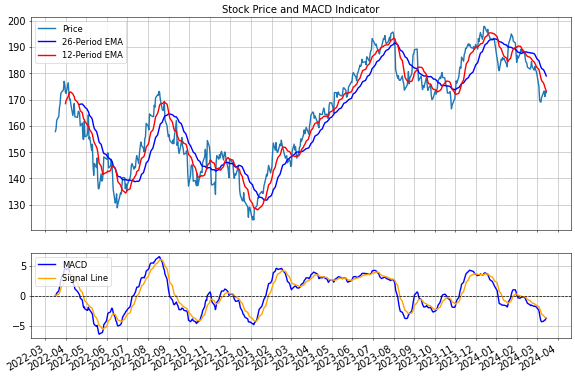

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a new figure and a grid of subplots with high DPI
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,8), dpi=50, gridspec_kw={'height_ratios': [2.5, 1]}, sharex=True)

# Plot the stock price on the first subplot
ax1.plot(macd_data.index, macd_data['Data'], label='Price', linewidth=2)
# Highlight the moving averages with thicker lines
ax1.plot(macd_data.index, macd_data['Data'].rolling(window=26).mean(), label='26-Period EMA', color='blue', linewidth=2)
ax1.plot(macd_data.index, macd_data['Data'].rolling(window=12).mean(), label='12-Period EMA', color='red', linewidth=2)

# Customize the font sizes
ax1.legend(loc='upper left', fontsize='large')
ax1.set_title('Stock Price and MACD Indicator', fontsize='x-large')
ax1.grid(True)

# Plot the MACD and signal lines on the second subplot with thicker lines
ax2.plot(macd_data.index, macd_data['MACD'], label='MACD', color='blue', linewidth=2)
ax2.plot(macd_data.index, macd_data['Signal'], label='Signal Line', color='orange', linewidth=2)

# Highlight the zero line with a thicker line
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.legend(loc='upper left', fontsize='large')
ax2.grid(True)

# Improve the x-axis date formatting
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Adjust the layout and pad the subplot to make room for the legend
plt.tight_layout(pad=3.0)

# Increase font sizes for the axes labels
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Show the plot
plt.show()


# RSI

# Bollinger Bands

# LSTM

# SVM

# TESTING!


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def moving_average_rule(data, short_window, long_window, band, delay, hold):
    # Calculate the short-term moving average
    data['short_mavg'] = data['Close'].rolling(window=short_window).mean()

    # Calculate the long-term moving average
    data['long_mavg'] = data['Close'].rolling(window=long_window).mean()

    # Initialize the 'signal' column to 0
    data['signal'] = 0

    # Generate buy signal (1) when the short-term moving average is greater than the long-term moving average multiplied by (1 + band)
    data.loc[data['short_mavg'] > data['long_mavg'] * (1 + band), 'signal'] = 1

    # Generate sell signal (-1) when the short-term moving average is less than the long-term moving average multiplied by (1 - band)
    data.loc[data['short_mavg'] < data['long_mavg'] * (1 - band), 'signal'] = -1

    # Shift the 'signal' column by the specified delay to create the 'position' column
    data['position'] = data['signal'].shift(delay)

    # Fill any NaN values in the 'position' column with 0 and convert the column to integer type
    data['position'] = data['position'].fillna(0).astype(int)

    # If a holding period is specified (hold > 0)
    if hold > 0:
        # Apply a rolling window of size 'hold' to the 'position' column
        # For each window, if the first value is not 0, set all values in the window to the first value, otherwise set them to 0
        data['position'] = data['position'].rolling(window=hold).apply(lambda x: x.iloc[0] if x.iloc[0] != 0 else 0)

    # Calculate the daily returns by shifting the 'position' column by 1 and multiplying it with the percentage change in the 'Close' price
    data['returns'] = data['position'].shift(1) * data['Close'].pct_change()

    # Calculate the cumulative returns by taking the cumulative product of (1 + daily returns) and subtracting 1
    data['cumulative_returns'] = (1 + data['returns']).cumprod() - 1

    # Return the modified DataFrame with the calculated columns
    return data


def white_reality_check(returns, num_bootstraps=1000):
    """
    Performs White's Reality Check on a set of trading strategy returns.
    Args:
        returns: A pandas DataFrame where each column represents the returns of a trading strategy.
        num_bootstraps: The number of bootstrap samples to generate.
    Returns:
        p_values: A pandas Series of p-values for each trading strategy.
    """

    # Calculate the performance statistic for each strategy
    performance_stats = returns.mean() / returns.std()

    # Generate bootstrap samples and calculate max statistics
    max_stats = []
    for _ in range(num_bootstraps):
        # Sample the returns with replacement
        bootstrap_sample = returns.sample(n=len(returns), replace=True, axis=0)
        # Calculate the mean over the sample and then the max statistic
        max_stat = (bootstrap_sample.mean() / bootstrap_sample.std()).max()
        max_stats.append(max_stat)

    # Calculate p-values
    p_values = pd.Series(index=returns.columns, dtype='float64')
    for strategy in returns.columns:
        p_value = np.mean(performance_stats[strategy] <= max_stats)
        p_values.at[strategy] = p_value

    return p_values

# Download stock data
symbol = 'TSLA'
start_date = '2015-01-01'
end_date = '2018-03-15'
data = yf.download(symbol, start=start_date, end=end_date)

# Define parameter values for the trading rule
short_windows = [1, 5, 10, 15]
long_windows = [10, 15, 50, 100, 200, 300]
bands = [0, 0.01, 0.05]
delays = [2, 3, 4]
holds = [1, 2, 5, 10]

# Create a DataFrame to store strategy returns
strategy_returns = pd.DataFrame(index=data.index)

# Iterate over all combinations of parameter values and apply the trading rule
for short_window in short_windows:
    for long_window in long_windows:
        if long_window <= short_window:
            continue
        for band in bands:
            for delay in delays:
                for hold in holds:
                    strategy_id = f"SW_{short_window}_LW_{long_window}_B_{band}_D_{delay}_H_{hold}"
                    results = moving_average_rule(data.copy(), short_window, long_window, band, delay, hold)
                    strategy_returns[strategy_id] = results['returns']

# Clean the data by removing columns full of NaN values (if any)
strategy_returns.dropna(axis=1, how='all', inplace=True)

# Apply White's Reality Check to the strategy returns
p_values = white_reality_check(strategy_returns)

# Filter out significant strategies based on p-values
significance_level = 0.05
significant_strategies = p_values[p_values < significance_level]

# Print out significant strategies and their corresponding p-values
if not significant_strategies.empty:
    print("Significant strategies at the significance level of", significance_level, ":")
    for strategy_id, p_value in significant_strategies.items():
        print(f"{strategy_id}: p-value = {p_value}")
else:
    print(f"No strategies found to be significant at the {significance_level} level.")


[*********************100%%**********************]  1 of 1 completed
<ipython-input-16-534b0af90729>:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strategy_returns[strategy_id] = results['returns']
<ipython-input-16-534b0af90729>:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  strategy_returns[strategy_id] = results['returns']
<ipython-input-16-534b0af90729>:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

No strategies found to be significant at the 0.05 level.


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2018-03-08,22.190666,22.219999,21.751333,21.940001,21.940001,53493000
2018-03-09,21.606667,21.899332,21.491333,21.811333,21.811333,82602000
2018-03-12,21.907333,23.147333,21.766666,23.034000,23.034000,123960000


In [ ]:
print(strategy_returns)

            SW_1_LW_10_B_0_D_2_H_1  SW_1_LW_10_B_0_D_2_H_2  \
Date                                                         
2015-01-02                     NaN                     NaN   
2015-01-05               -0.000000                     NaN   
2015-01-06                0.000000                0.000000   
2015-01-07               -0.000000               -0.000000   
2015-01-08               -0.000000               -0.000000   
...                            ...                     ...   
2018-03-08                0.009630                0.009630   
2018-03-09                0.005865                0.005865   
2018-03-12               -0.056057               -0.056057   
2018-03-13                0.010622                0.010622   
2018-03-14                0.044494                0.044494   

            SW_1_LW_10_B_0_D_2_H_5  SW_1_LW_10_B_0_D_2_H_10  \
Date                                                          
2015-01-02                     NaN                      NaN   
2015